In [28]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the configuration of the plots we will create

# Read in the data

df = pd.read_csv('/Users/khanhtien/Downloads/movies.csv')

In [42]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_release,yearcorrect
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,United States,2009
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,United States,2019
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,United States,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,United States,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,United States,2018


In [3]:
# Let's see if there's any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [29]:
# Change data types of columns

df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 

In [41]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_release,yearcorrect
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,United States,2009
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,United States,2019
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,United States,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,United States,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,United States,2018


In [30]:
# Change released column to get desired format

df[['released','country_release']] = df['released'].str.split(' \(',n=1,expand=True) #split in 2 columns: release date and country
df['country_release'] = df['country_release'].str.replace(')','') #clean the country_release column
df['released'] = pd.to_datetime(df['released'],format='mixed') #format the released column to datetime

In [40]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_release,yearcorrect
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,United States,2009
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,United States,2019
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,United States,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,United States,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,United States,2018


In [31]:
# Create correct Year column

df['yearcorrect'] = df['released'].astype(str).str[:4]

In [39]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_release,yearcorrect
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,United States,2009
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,United States,2019
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,United States,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,United States,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,United States,2018


In [32]:
# Sort by revenue

df=df.sort_values(by=['gross'], inplace=False, ascending=False)

In [12]:
pd.set_option('display.max_rows', None)

In [13]:
# Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3698                              Zentropa Entertainments
1175                                 Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [44]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_release,yearcorrect
5445,533,5,0,2009,2009-12-18,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,56,29
7445,535,5,0,2019,2019-04-26,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,56,39
3045,6896,5,6,1997,1997-12-19,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,56,17
6663,5144,5,0,2015,2015-12-18,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,56,35
7244,536,5,0,2018,2018-04-27,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,56,38


In [15]:
# Predictions: Budget high correlation, company high correlation

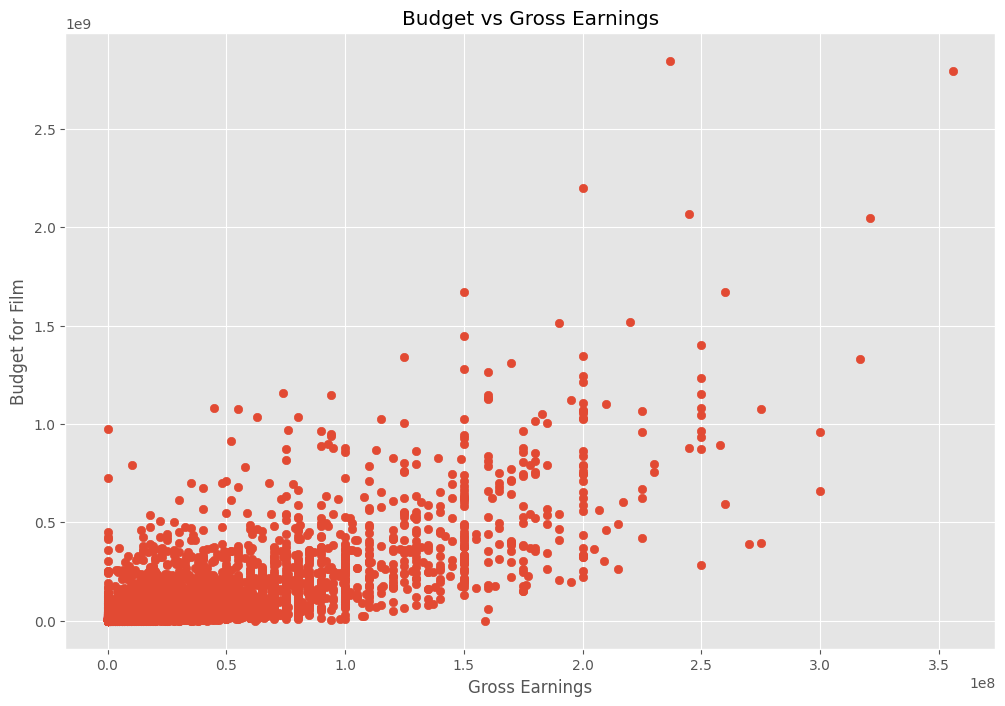

In [16]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [17]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_release,yearcorrect
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,United States,2009
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,United States,2019
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,United States,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,United States,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,United States,2018


<Axes: xlabel='budget', ylabel='gross'>

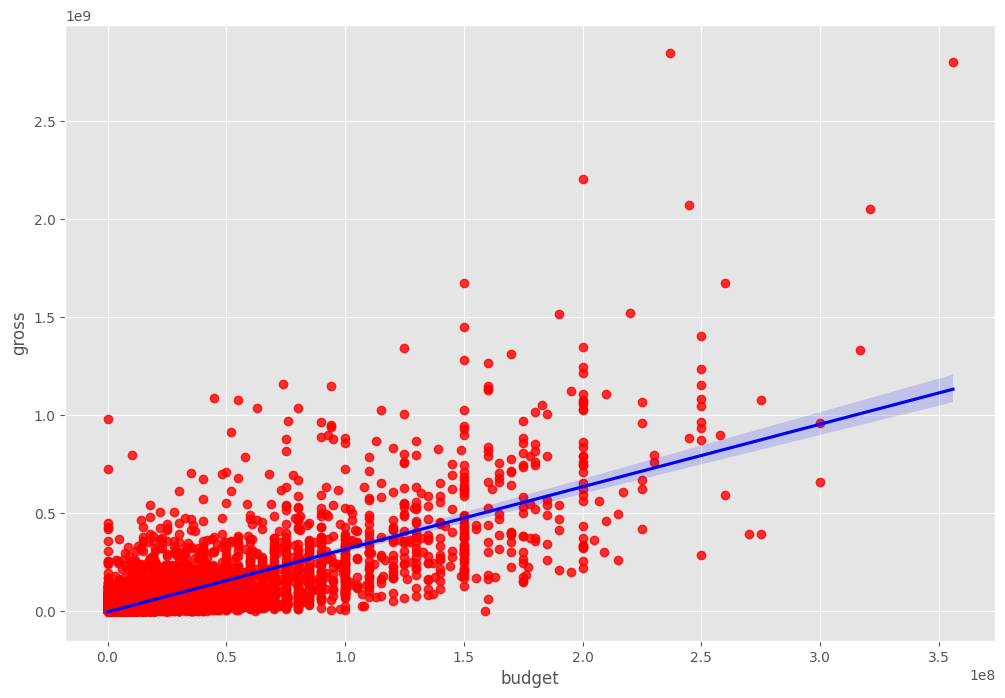

In [18]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross',data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [19]:
# Let's start looking at correlation

df.select_dtypes(include='number').corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


In [20]:
# High correlation between budget and gross
# I was right

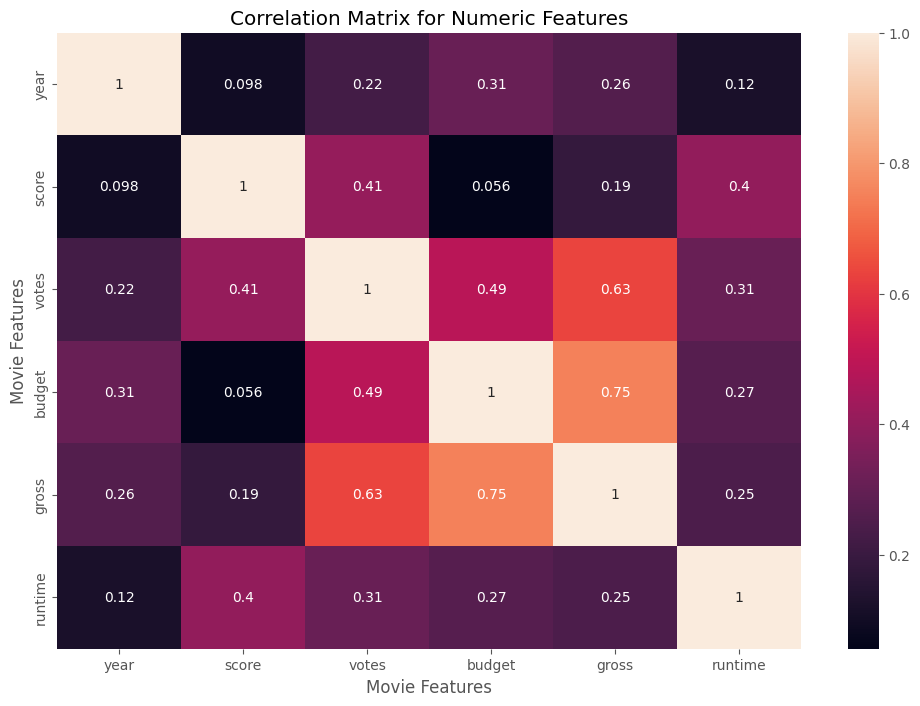

In [23]:
correlation_matrix = df.select_dtypes(include='number').corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [24]:
# Look at company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_release,yearcorrect
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,United States,2009
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,United States,2019
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,United States,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,United States,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,United States,2018


In [43]:
df_numerized = df

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_release,yearcorrect
5445,533,5,0,2009,2009-12-18,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,56,29
7445,535,5,0,2019,2019-04-26,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,56,39
3045,6896,5,6,1997,1997-12-19,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,56,17
6663,5144,5,0,2015,2015-12-18,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,56,35
7244,536,5,0,2018,2018-04-27,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,56,38


In [45]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_release,yearcorrect
5445,533,5,0,2009,2009-12-18,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,56,29
7445,535,5,0,2019,2019-04-26,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,56,39
3045,6896,5,6,1997,1997-12-19,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,56,17
6663,5144,5,0,2015,2015-12-18,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,56,35
7244,536,5,0,2018,2018-04-27,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,56,38


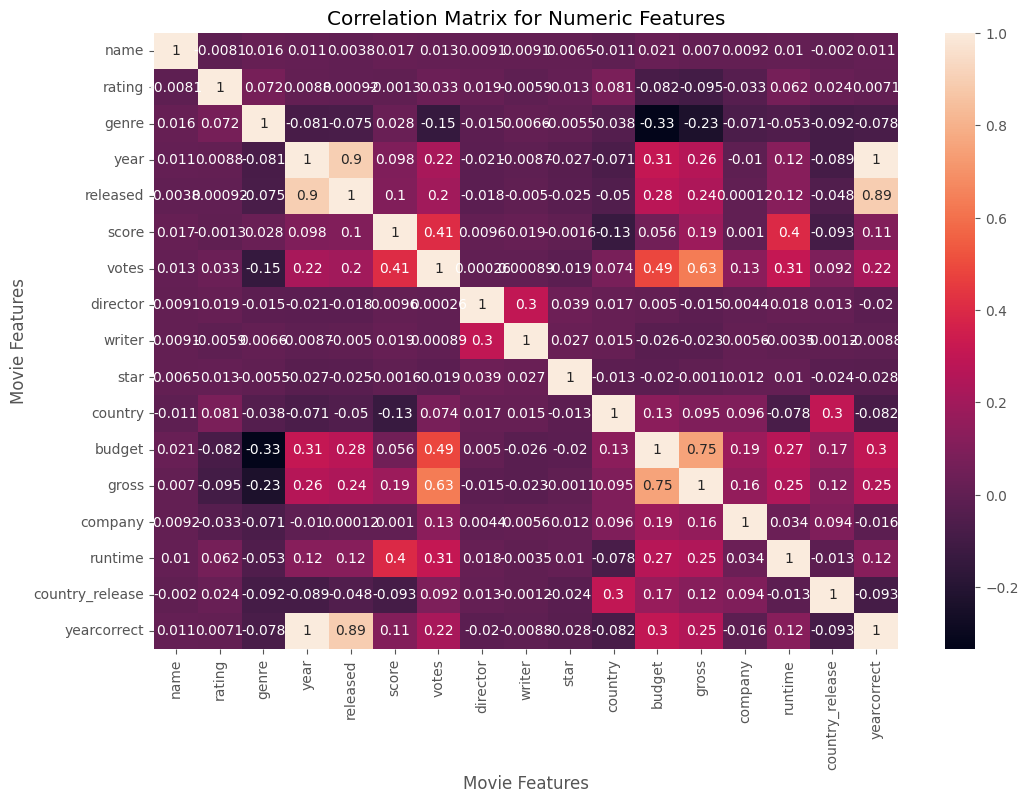

In [34]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [35]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_release,yearcorrect
name,1.000000,-0.008069,0.016355,0.011453,0.003816,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392,-0.001968,0.011134
rating,-0.008069,1.000000,0.072423,0.008779,0.000915,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145,0.023977,0.007054
genre,0.016355,0.072423,1.000000,-0.081261,-0.075206,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711,-0.091572,-0.077550
year,0.011453,0.008779,-0.081261,1.000000,0.897431,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.120811,-0.089289,0.997295
released,0.003816,0.000915,-0.075206,0.897431,1.000000,0.102120,0.198768,-0.018369,-0.004975,-0.024874,-0.050348,0.277858,0.235541,0.000118,0.122463,-0.048476,0.892556
score,0.017097,-0.001314,0.027965,0.097995,0.102120,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451,-0.092763,0.105601
votes,0.013088,0.033225,-0.145307,0.222945,0.198768,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.632834,0.133204,0.309212,0.092014,0.218364
director,0.009079,0.019483,-0.015258,-0.020795,-0.018369,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624,0.013331,-0.020439
writer,0.009081,-0.005921,0.006567,-0.008656,-0.004975,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511,-0.001201,-0.008807
star,0.006472,0.013405,-0.005477,-0.027242,-0.024874,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.010174,-0.023540,-0.027576


In [36]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name             name               1.000000
                 rating            -0.008069
                 genre              0.016355
                 year               0.011453
                 released           0.003816
                 score              0.017097
                 votes              0.013088
                 director           0.009079
                 writer             0.009081
                 star               0.006472
                 country           -0.010737
                 budget             0.020548
                 gross              0.006989
                 company            0.009211
                 runtime            0.010392
                 country_release   -0.001968
                 yearcorrect        0.011134
rating           name              -0.008069
                 rating             1.000000
                 genre              0.072423
                 year               0.008779
                 released           0.000915
          

In [37]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

genre            budget            -0.334021
budget           genre             -0.334021
genre            gross             -0.234297
gross            genre             -0.234297
genre            votes             -0.145307
votes            genre             -0.145307
country          score             -0.133348
score            country           -0.133348
gross            rating            -0.095450
rating           gross             -0.095450
yearcorrect      country_release   -0.093351
country_release  yearcorrect       -0.093351
                 score             -0.092763
score            country_release   -0.092763
country_release  genre             -0.091572
genre            country_release   -0.091572
year             country_release   -0.089289
country_release  year              -0.089289
yearcorrect      country           -0.082274
country          yearcorrect       -0.082274
budget           rating            -0.081939
rating           budget            -0.081939
year      

In [38]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross            votes              0.632834
votes            gross              0.632834
gross            budget             0.750157
budget           gross              0.750157
released         yearcorrect        0.892556
yearcorrect      released           0.892556
released         year               0.897431
year             released           0.897431
                 yearcorrect        0.997295
yearcorrect      year               0.997295
name             name               1.000000
writer           writer             1.000000
runtime          runtime            1.000000
company          company            1.000000
gross            gross              1.000000
budget           budget             1.000000
country          country            1.000000
star             star               1.000000
director         director           1.000000
votes            votes              1.000000
score            score              1.000000
released         released           1.000000
year      

In [ ]:
# Votes and budget really have the highest correlation to gross earnings
# Company has low correlation